# MNIST Classifier Demo

## Overview
This notebook demonstrates the process of training and evaluating multiple machine learning models for classifying handwritten digits from the MNIST dataset. The models include:

1. **Random Forest (RF)** - A traditional machine learning algorithm based on decision trees.
2. **Feed-Forward Neural Network (NN)** - A simple fully connected neural network.
3. **Convolutional Neural Network (CNN)** - A deep learning model designed to handle image data efficiently.

The notebook also includes:
- Visualizations of random predictions from each model, with correct predictions displayed in green and incorrect ones in red.
- An exploration of model performance under noisy conditions by adding random noise to the test images and evaluating the models' robustness.

## Importing Libraries

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from classifier import MnistClassifier

## Preparing the Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_nn = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_nn = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.0

scaler = StandardScaler()
X_train_rf = scaler.fit_transform(X_train_nn)
X_test_rf = scaler.transform(X_test_nn)

This block preprocesses the MNIST dataset.

- mnist.load_data() loads the MNIST dataset, split into training and testing sets.
- The data is reshaped to 1D arrays and normalized by dividing by 255.0 for the Neural Network (NN) model.
- The data is also reshaped for the Convolutional Neural Network (CNN) model to have a shape of (28, 28, 1).
- StandardScaler is used to standardize the feature values for the Random Forest (RF) model.

## Function to Plot Random Predictions

In [3]:
def plot_random_predictions(images, true_labels, pred_labels, num_images=10):
    indices = np.random.choice(len(images), num_images, replace=False)
    
    plt.figure(figsize=(10, 2))
    
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx].squeeze(), cmap="gray")
        plt.axis("off")
        color = "green" if true_labels[idx] == pred_labels[idx] else "red"
        plt.title(f"T:{true_labels[idx]}\nP:{pred_labels[idx]}", color=color)
    
    plt.show()

This function visualizes a specified number of randomly chosen images from the test set.

- It randomly selects indices for num_images images.
- The images are displayed with their true and predicted labels.
- Correct predictions are highlighted in green, while incorrect ones are shown in red.

## Instantiate Models

In [4]:
random_forest_model = MnistClassifier("rf")
feed_forward_nn_model = MnistClassifier("nn")
cnn_model = MnistClassifier("cnn")

## Train Random Forest Model

In [5]:
print("Training RF model...")
random_forest_model.train(X_train_rf, y_train)

Training RF model...


## Train Feed-Forward Neural Network Model

In [6]:
print("Training NN model...")
feed_forward_nn_model.train(X_train_nn, y_train)

Training NN model...
Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2577 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1164 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0786 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 3s

## Train Convolutional Neural Network Model

In [7]:
print("Training CNN model...")
cnn_model.train(X_train_cnn, y_train)

Training CNN model...
Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1470 - accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0519 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0105 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0071 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 10/10
1875/1875 [=========================

## Predict and Evaluate all models

In [8]:
y_rf_pred = random_forest_model.predict(X_test_rf)

In [9]:
print(classification_report(y_rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       997
           1       0.99      0.99      0.99      1133
           2       0.97      0.96      0.96      1043
           3       0.96      0.95      0.96      1020
           4       0.97      0.97      0.97       977
           5       0.96      0.97      0.97       877
           6       0.98      0.97      0.98       964
           7       0.96      0.97      0.97      1021
           8       0.96      0.96      0.96       970
           9       0.95      0.96      0.95       998

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



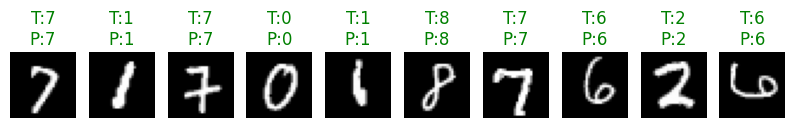

In [10]:
plot_random_predictions(X_test, y_test, y_rf_pred)

In [11]:
y_nn_pred = feed_forward_nn_model.predict(X_test_nn)

313/313 [==============================] - 0s 987us/step


In [12]:
print(classification_report(y_nn_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       993
           1       0.99      0.98      0.99      1147
           2       0.97      0.98      0.98      1014
           3       0.99      0.96      0.98      1042
           4       0.97      0.98      0.98       969
           5       0.96      0.98      0.97       874
           6       0.98      0.99      0.98       953
           7       0.96      0.98      0.97      1008
           8       0.98      0.96      0.97       985
           9       0.98      0.97      0.98      1015

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



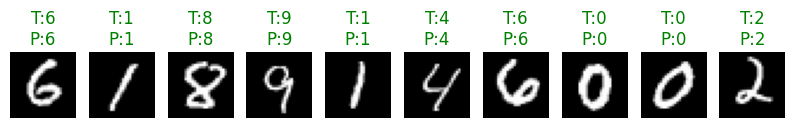

In [13]:
plot_random_predictions(X_test, y_test, y_nn_pred)

In [14]:
y_cnn_pred = cnn_model.predict(X_test_cnn)

313/313 [==============================] - 1s 2ms/step


In [15]:
print(classification_report(y_cnn_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       988
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1031
           3       0.99      0.99      0.99      1016
           4       0.99      0.99      0.99       978
           5       0.99      0.99      0.99       888
           6       0.99      0.98      0.99       965
           7       0.99      0.99      0.99      1027
           8       0.99      0.99      0.99       974
           9       0.97      0.98      0.98       998

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



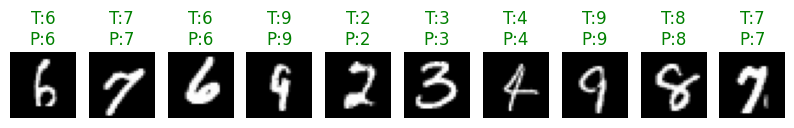

In [16]:
plot_random_predictions(X_test, y_test, y_cnn_pred)

### The CNN model was the most accurate among the other models. According to the classification report metric, the CNN model guessed each individual class better than any other.

## Testing the most accurate model (CNN) on noisy data

In [17]:
def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

In [18]:
X_test_cnn_noisy = add_noise(X_test_cnn, noise_factor=0.3)
y_cnn_pred_noisy = cnn_model.predict(X_test_cnn_noisy)
print(classification_report(y_cnn_pred_noisy, y_test))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       779
           1       0.92      0.89      0.90      1167
           2       0.99      0.57      0.72      1802
           3       0.94      0.86      0.90      1104
           4       0.92      0.89      0.90      1021
           5       0.91      0.93      0.92       865
           6       0.89      0.98      0.94       871
           7       0.94      0.74      0.83      1299
           8       0.65      0.96      0.78       660
           9       0.43      1.00      0.60       432

    accuracy                           0.84     10000
   macro avg       0.84      0.88      0.84     10000
weighted avg       0.88      0.84      0.84     10000



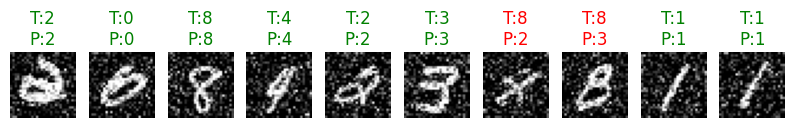

In [19]:
plot_random_predictions(X_test_cnn_noisy, y_test, y_cnn_pred_noisy)

### On noisy data, the quality of predicting numbers dropped, which is bad for the model, so it means that it is overtrained on clean data, and on new (noisy) data, it is not robust

### Also, to get the right prediction, we have to prepare the image for each model differently. In the case of a random forest, the data must be standardized, and with CNN, the array must be transformed into the following shape: (28, 28, 1).